# Lab 8.3.1 - Fitting Classification Tree

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report
from sklearn import tree
from sklearn.externals.six import StringIO 
import matplotlib.pyplot as plt
import graphviz


# inspiration: https://github.com/qx0731/ISL_python/blob/master/Chapter_8_sec_8.3.ipynb

In [2]:
Carseats = pd.read_csv('CarSeats.csv', header=0, na_values='NA')
print(Carseats.shape)
Carseats.head()

(400, 12)


,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
#Sales is a continuous variable, making it a binary variable, with a limit at 8
Carseats['High'] = Carseats.Sales.map(lambda x: 'Y' if x>8 else 'N')
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
Unnamed: 0     400 non-null int64
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
High           400 non-null object
dtypes: float64(1), int64(8), object(4)
memory usage: 40.7+ KB


In [4]:
# Changing object paramters into int, float, and float respectively. 
Carseats.ShelveLoc = pd.factorize(Carseats.ShelveLoc)[0]
Carseats.Urban = Carseats.Urban.map({'No':0, 'Yes':1})
Carseats.US = Carseats.US.map({'No':0, 'Yes':1}) 
Carseats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
Unnamed: 0     400 non-null int64
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null int64
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null int64
US             400 non-null int64
High           400 non-null object
dtypes: float64(1), int64(11), object(1)
memory usage: 40.7+ KB


In [5]:
# spitting into training and test data: 
X = Carseats.drop(['Sales', 'High'], axis=1)
Y = Carseats.High
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=200, random_state=0)

C:\Users\diteh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
# making a decision tree using Gini
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X, Y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
print(classification_report(Y, clf.predict(X)))

              precision    recall  f1-score   support

           N       0.89      0.99      0.94       236
           Y       0.98      0.82      0.89       164

   micro avg       0.92      0.92      0.92       400
   macro avg       0.93      0.91      0.91       400
weighted avg       0.93      0.92      0.92       400



In [8]:
print(clf.score(X_train, Y_train))

0.905


In [9]:
# the same on the train data
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)


# Confusion matrix -  not the same numbers as in the book 
cm = pd.DataFrame(confusion_matrix(Y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm


True,No,Yes
Predicted,,
No,98,28
Yes,20,54


In [10]:
print('Accuracy is ', accuracy_score(Y_test,pred)*100)
# can also be calculated as (99+52)/200 = 0.755

Accuracy is  76.0


In [11]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           N       0.78      0.83      0.80       118
           Y       0.73      0.66      0.69        82

   micro avg       0.76      0.76      0.76       200
   macro avg       0.75      0.74      0.75       200
weighted avg       0.76      0.76      0.76       200



In [12]:
# code from: 
#https://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%208.ipynb#8.3.1-Fitting-Classification-Trees
import pydot
from IPython.display import Image

# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)



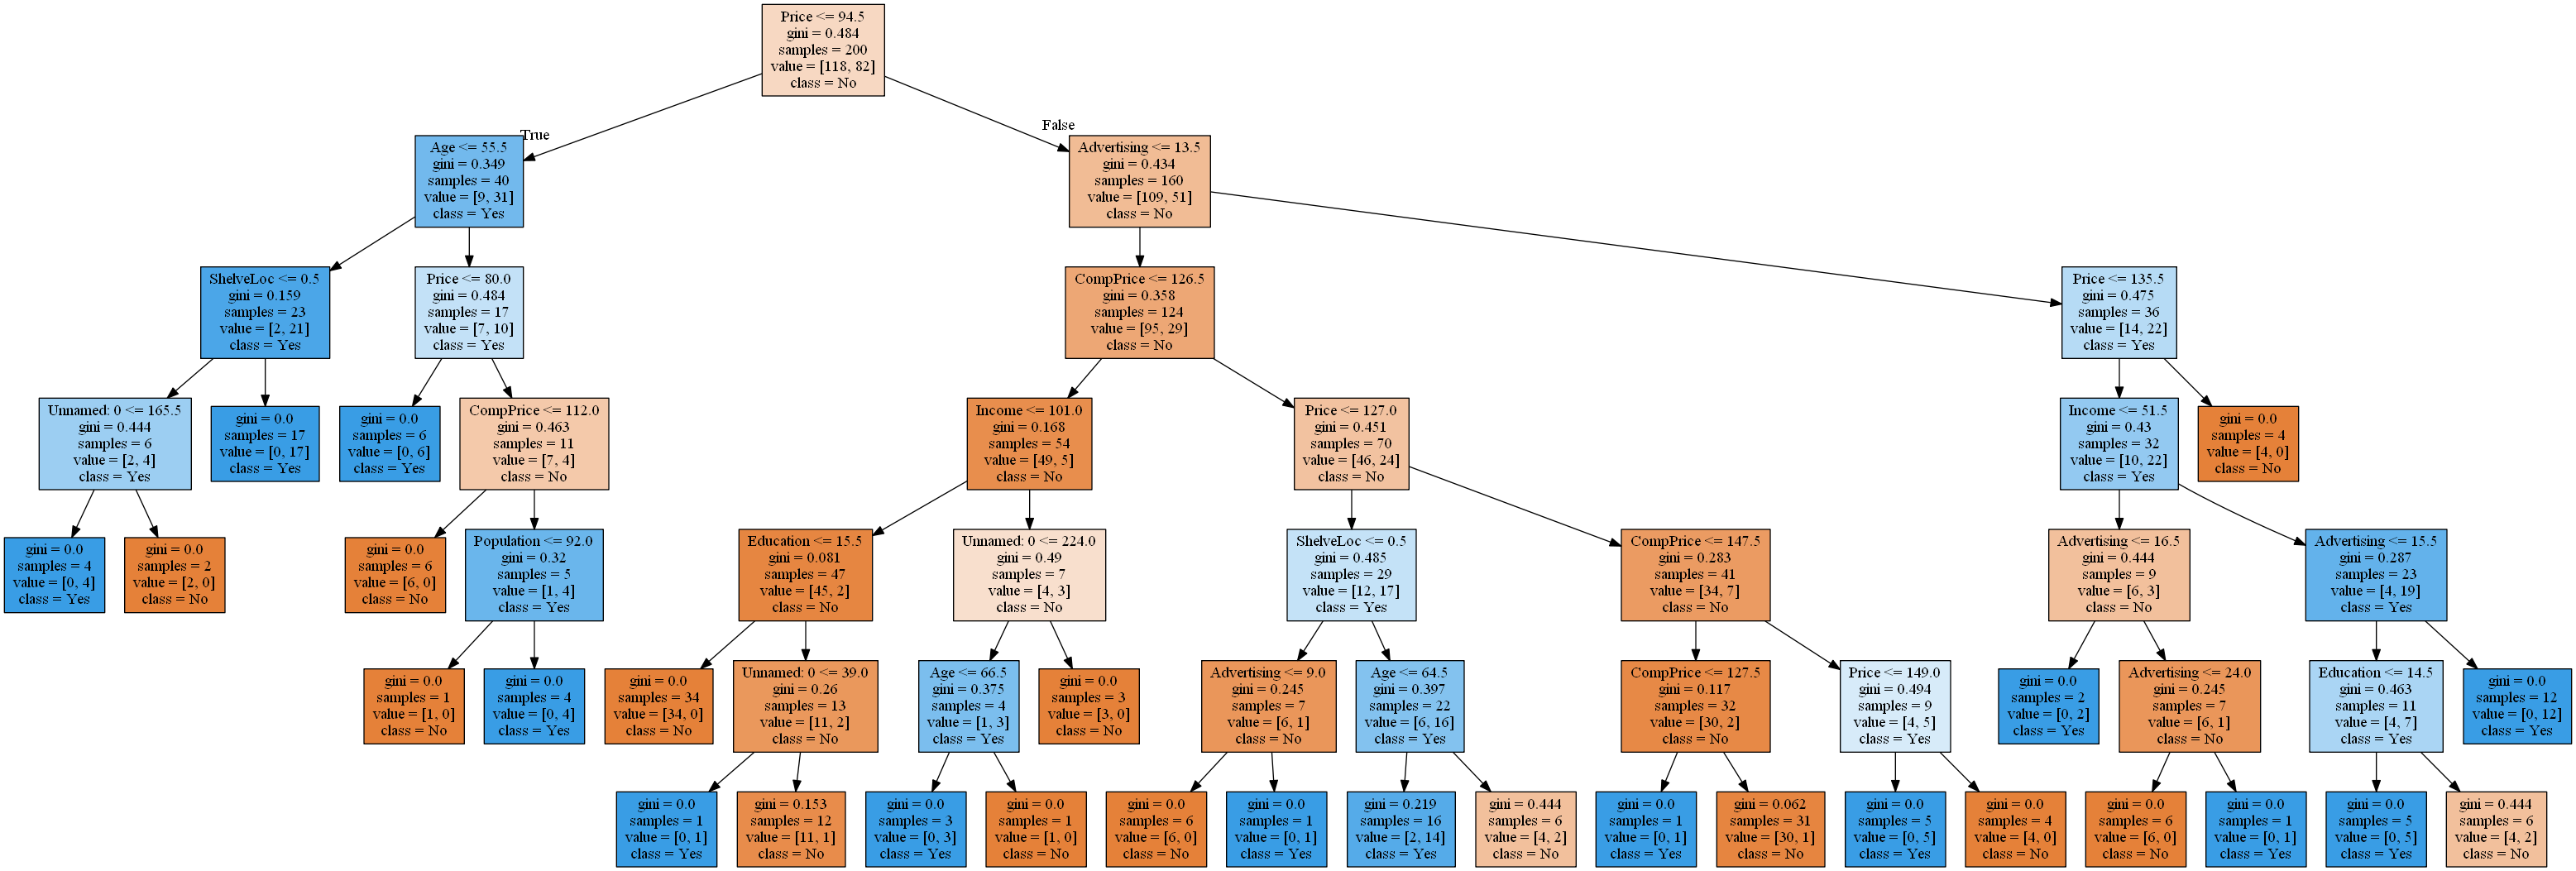

In [13]:
graph, = print_tree(clf, features=X.columns, class_names=['No', 'Yes'])
Image(graph.create_png())



# Lab 8.3.2 - Fitting Regression Tree

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree
from sklearn import datasets, linear_model
import graphviz
import matplotlib.pyplot as plt
import math

In [15]:
boston = datasets.load_boston()

In [16]:
X = boston.data
y = boston.target

In [17]:
# The boston data set is spilt into training and test data for both X and y:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

C:\Users\diteh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
regr_tree = DecisionTreeRegressor(max_depth=2)
regr_tree.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

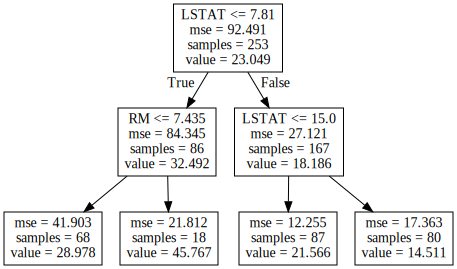

In [19]:
export_graphviz(regr_tree, out_file="832Tree.dot", feature_names=boston.feature_names)
with open("832Tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [20]:
# Making predictions on the test data and calculating MSE based on that. 
y_pred = regr_tree.predict(X_test)
msr = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', msr)


Mean squared error:  28.80154486445795


Text(0, 0.5, 'y_test')

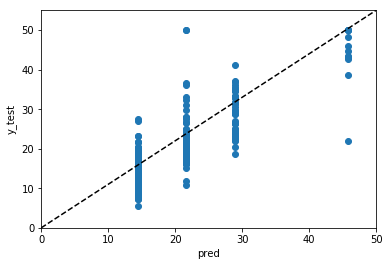

In [21]:
plt.scatter(y_pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlim(0,50)
plt.ylim(0,55)
plt.xlabel('pred')
plt.ylabel('y_test')

# Lab 8.3.3 - Bagging and Random Forest 

Using Boston data from before. 
The RandomForestRegressor is used where all_features is set to the max_features so we have: m = p: we use all predictors.

In [22]:
all_features = X_train.shape[1]  # 13
regr_bagging = RandomForestRegressor(max_features=all_features, random_state=1)
regr_bagging.fit(X_train, y_train)

C:\Users\diteh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [23]:
# The mean square error is calculator:
y_pred = regr_bagging.predict(X_test)
msr = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', msr)
# The mean squared error is found to be 18.29

Mean squared error:  18.290404743083002


Since we have 13 features we use the max_feature = 4 (close to square root of 13 (3.60555)) when growing the random tree. Squareroot of p is used as the number of variables when building a random forest of classification trees.

In [24]:
regr_randomforest = RandomForestRegressor(max_features=4, random_state=1)
regr_randomforest.fit(X_train, y_train)

y_pred = regr_randomforest.predict(X_test)
msr = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', msr)

Mean squared error:  16.893475889328062


C:\Users\diteh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


As we see the MSE is less for forest tree than for bagging (16.89 vs. 18.29) we see that random forests yielded an improvement over bagging in this case.

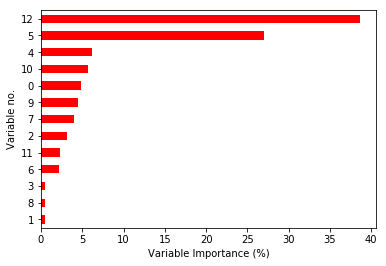

In [25]:
Importance = pd.DataFrame({'Importance':regr_randomforest.feature_importances_*100})
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance (%)')
plt.ylabel('Variable no.')
plt.gca().legend_ = None



In [26]:
print(Importance)

    Importance
0     4.887671
1     0.495932
2     3.177065
3     0.529828
4     6.124730
5    26.998618
6     2.148140
7     3.945945
8     0.505104
9     4.524073
10    5.722647
11    2.327268
12   38.612979


The importance values are based upon the mean decrease of accuracy in predictions on the out of bag samples when a given variable is excluded from the model.

In [27]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

From this we see that the LSTAT (wealth level of the community) and the RM (house size) variables are the most important ones.

# Lab 8.3.4 - Boosting 

The GradientBoostingRegressor package is used here. The argument n_estimators=500 indicates that we want 500 trees, and the option interaction.depth=4 limits the depth of each tree.

In [28]:
regr_boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.02, max_depth=4, random_state=1)
regr_boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.02, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

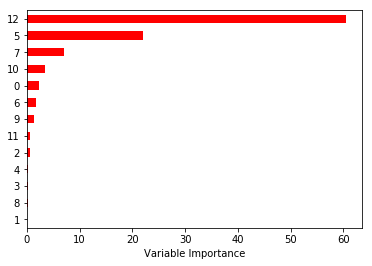

In [29]:
# The feature importance is determined
feature_importance = regr_boost.feature_importances_*100
rel_imp = pd.Series(feature_importance).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [30]:
y_pred = regr_boost.predict(X_test)
msr = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', msr)

Mean squared error:  16.93701485084162


We see again that: the LSTAT (wealth level of the community) and the RM (house size) variables are the most important ones. And we see a MSE with a value of 16.94, which is close to the forest tree MSE and therefore, better than the MSE for bagging.